(1024, 1280, 56)


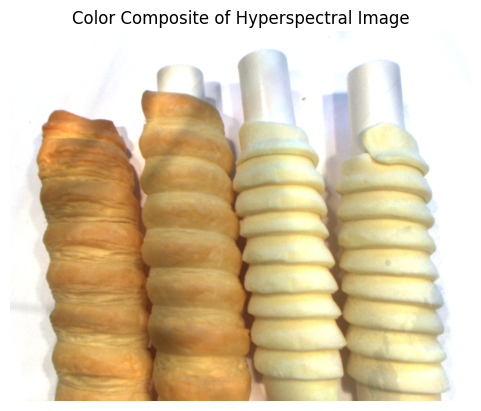

In [37]:
import spectral
import numpy as np
import matplotlib.pyplot as plt
from spectral import settings
from z_samTool import SAM2ImageProcessor

# 设置ENVI支持非小写参数
settings.envi_support_nonlowercase_params = True

# 定义高光谱文件路径
hdr_path = r'D:\00-dataset\高光谱\号角酥（生熟左边两个）.hdr'
# 读取HDR文件
img = spectral.open_image(hdr_path).load()

# 选择RGB波段（通常是可见光的波段，红、绿、蓝）
# 假设HDR文件中有至少三个波段：红、绿、蓝
# 可以根据实际的文件选择波段
rgb = img[:, :, [29, 19, 9]]  # 选择波段（例如：29, 19, 9通常为红、绿、蓝波段）
print(img.shape)
# 显示彩色图像
plt.imshow(rgb)
plt.title('Color Composite of Hyperspectral Image')
plt.axis('off')
plt.show()

区域面积: 200111


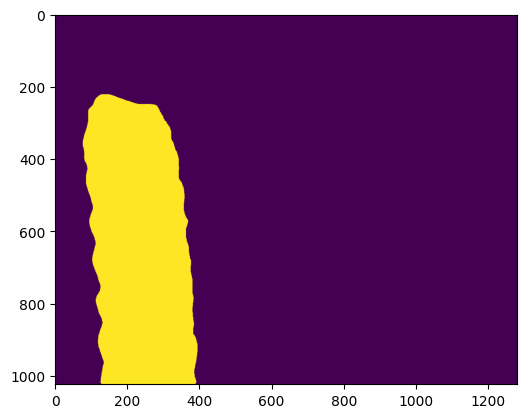

In [38]:
import cv2
checkpoint = "D:/01-code/00-python/sam2_label/checkpoints/sam2.1_hiera_base_plus.pt"
model_cfg  = "D:/01-code/00-python/sam2_label/sam2/configs/sam2.1/sam2.1_hiera_b+.yaml"

processor = SAM2ImageProcessor(checkpoint, model_cfg)
contours_pts = [[233, 346],[294, 911]]
labels = [ 1,  1]

contours, mask_mat = processor.detect(rgb, contours_pts, labels, 100, 10, 500)
cv2.imwrite('mask.png', mask_mat)
plt.imshow(mask_mat)

In [39]:
mask_array = np.array(mask_mat) > 0 

# 将data_cube转换为numpy数组后再进行索引操作
# 将data_cube转换为numpy数组并确保是3D数组
# data_array = np.array(img)
masked_data = img[mask_array, :]


# 计算平均光谱、最大值光谱、最小值光谱
average_spectrum = masked_data.mean(axis=0)
max_spectrum = masked_data.max(axis=0)
min_spectrum = masked_data.min(axis=0)